## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# **Detección de neumonía mediante redes neuronales convolucionales**

**Objetivo:**

La infección por neumonía es una enfermedad grave de los pulmones con varias causas posibles. Las bacterias, virus u hongos pueden causar la infección que se clasifica como la octava causa principal de muertes en los Estados Unidos y causa la muerte en niños menores de cinco años en todo el mundo. Para salvar vidas preciosas, muchas personas y la tecnología deben interactuar.

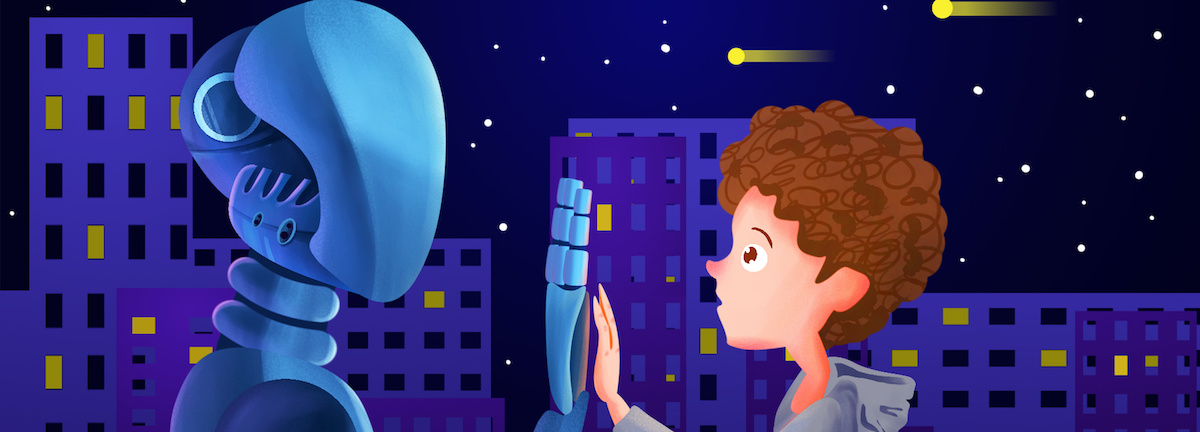

Las radiografías de tórax se utilizan para detectar la infección por neumonía y localizar el área infectada en los pulmones. Por lo tanto, para detectar la neumonía, el radiólogo debe observar la radiografía de tórax y debe informar correctamente al médico. El objetivo principal de este modelo es identificar si la persona tiene neumonía o no con alta precisión, para que la persona pueda recibir tratamiento lo antes posible. Los modelos de Deep Learning que están correctamente entrenados utilizando buenos conjuntos de datos pueden ser útiles para los médicos. El modelo utilizado para detectar si la persona tiene neumonía o no, es una Red Neuronal Convolucional (CNN) entrenada con las imágenes de las radiografías de tórax y que luego puede predecir con alta precisión.

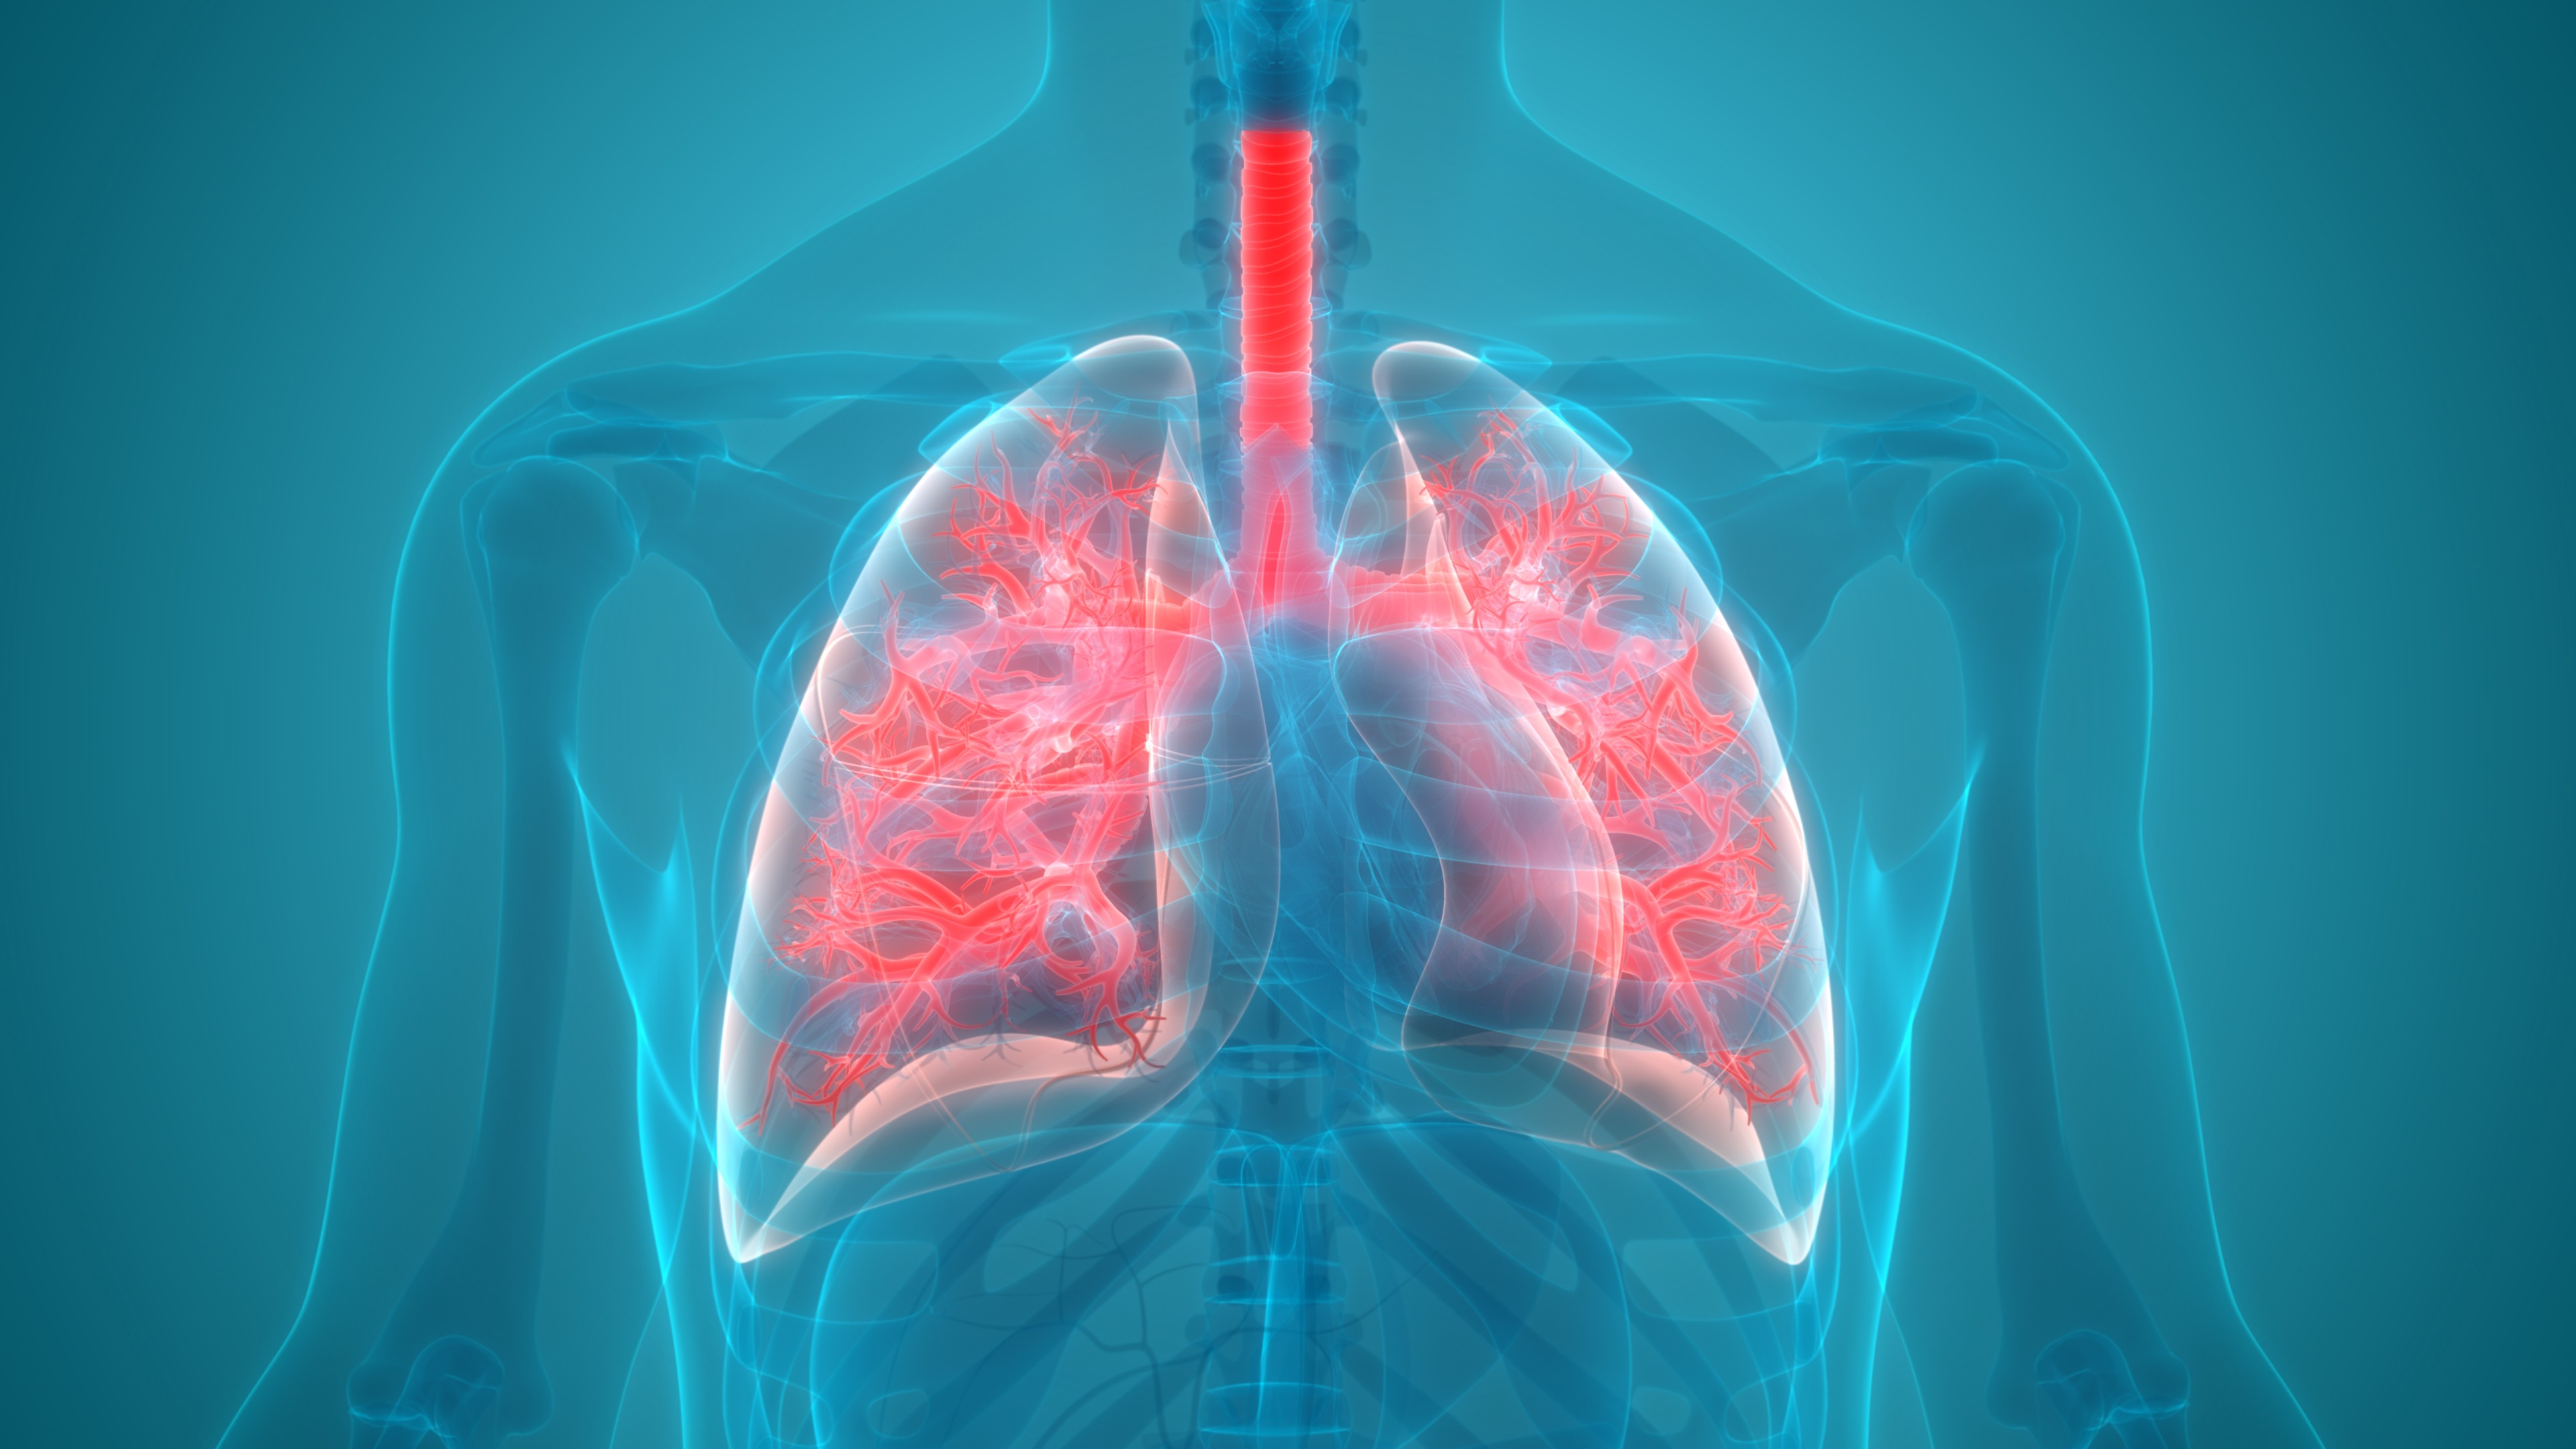

**Importación de librerías**

Las librerías son conjuntos de herramientas que ayudan a realizar tareas específicas. En ciencia de datos, son muy útiles porque facilitan el trabajo con datos, permiten aplicar técnicas de aprendizaje automático, hacer análisis estadísticos y crear gráficos.

In [ ]:
# ! pip install tensorflow
# %%capture
# %pip install tensorflow==2.15

In [ ]:
import numpy as np
import pandas as pd

import os
import requests

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# EDA - Análisis Exploratorio de Datos

El siguiente código guarda la ruta de la capeta **"chest_xray"** en la variable **path**. Luego, esta variable se puede usar para acceder a los archivos de imágenes de rayos X.

In [ ]:
path = "/content/drive/MyDrive/Bootcamp Ciencia de Datos e IA - UDD/M7/Proyecto7/chest_xray"

El siguiente código muestra una lista de archivos y carpetas dentro del directorio indicado por la variable path. La función os.listdir() devuelve los nombres de los archivos y carpetas, y luego print() los imprime en la consola, que se verá después de ejecutar el código.

In [ ]:
print("Contenido carpeta chest_xray:")
print(os.listdir(path))

Contenido carpeta chest_xray:
['__MACOSX', 'chest_xray', 'test', 'val', 'train']


Los siguientes códigos asignan las rutas de acceso a las variables train_path, val_path y test_path. Esto nos permitirá acceder más tarde a los archivos de imágenes de rayos X que se usarán en el modelo.

In [ ]:
train_path = "/content/drive/MyDrive/Bootcamp Ciencia de Datos e IA - UDD/M7/Proyecto7/chest_xray/train"
print("Contenido train_path: ", os.listdir(train_path))

Contenido train_path:  ['NORMAL', 'PNEUMONIA']


In [ ]:
val_path = "/content/drive/MyDrive/Bootcamp Ciencia de Datos e IA - UDD/M7/Proyecto7/chest_xray/val"
print("Contenido val_path: ", os.listdir(val_path))

Contenido val_path:  ['PNEUMONIA', 'NORMAL']


In [ ]:
test_path = "/content/drive/MyDrive/Bootcamp Ciencia de Datos e IA - UDD/M7/Proyecto7/chest_xray/test"
print("Contenido test_path: ", os.listdir(test_path))

Contenido test_path:  ['PNEUMONIA', 'NORMAL']


Los siguientes códigos cuentan el número de imágenes de cada clase en cada conjunto de datos. Estos resultados ayudan a evaluar la distribución de las clases. Luego, se utiliza print() para mostrar cuántas imágenes hay en las categorías: entrenamiento normal (train normal), entrenamiento con neumonía (train pneumonía), validación normal (val normal), validación con neumonía (val pneumonía), prueba normal (test normal) y prueba con neumonía (test pneumonía).

In [ ]:
print("Conjunto de entrenamiento")
num_train_normal = len(os.listdir(os.path.join(train_path, "NORMAL")))
num_train_pneumonia = len(os.listdir(os.path.join(train_path, "PNEUMONIA")))

print("Cantidad de imágenes train normal: ", num_train_normal)
print("Cantidad de imágenes train pneumonia: ", num_train_pneumonia)

Conjunto de entrenamiento
Cantidad de imágenes train normal:  1341
Cantidad de imágenes train pneumonia:  3875


In [ ]:
print("Conjunto de validación")
num_val_normal = len(os.listdir(os.path.join(val_path, "NORMAL")))
num_val_pneumonia = len(os.listdir(os.path.join(val_path, "PNEUMONIA")))

print("Cantidad de imágenes val normal: ", num_val_normal)
print("Cantidad de imágenes val pneumonia: ", num_val_pneumonia)

Conjunto de validación
Cantidad de imágenes val normal:  8
Cantidad de imágenes val pneumonia:  8


In [ ]:
print("Conjunto de test")
num_test_normal = len(os.listdir(os.path.join(test_path, "NORMAL")))
num_test_pneumonia = len(os.listdir(os.path.join(test_path, "PNEUMONIA")))

print("Cantidad de imágenes test normal: ", num_test_normal)
print("Cantidad de imágenes test pneumonia: ", num_test_pneumonia)

Conjunto de test
Cantidad de imágenes test normal:  234
Cantidad de imágenes test pneumonia:  390


El siguiente código lee una imagen de cada conjunto de datos para visualizarla o preprocesarla.

Explicación: Visualización de imágenes de radiografías

- plt.imread(...): Utiliza Matplotlib para cargar imágenes desde archivos y convertirlas en arrays de NumPy.
- os.path.join(...): Combina las rutas de carpetas y nombres de archivos para obtener la ruta completa de cada imagen.
- train_path, test_path, val_path: Son las rutas de las carpetas de entrenamiento, prueba y validación, respectivamente.
- "NORMAL", "PNEUMONIA": Son las subcarpetas dentro de cada conjunto que contienen imágenes clasificadas como "NORMAL" (sin neumonía) o "PNEUMONIA" (con neumonía).

Luego, podemos usar estas imágenes para ver ejemplos de cada clase o para preprocesarlas antes de ingresarlas al modelo.

In [ ]:
img_train_normal = plt.imread(os.path.join(train_path, "NORMAL", "IM-0180-0001.jpeg"))
img_train_pneumonia = plt.imread(os.path.join(train_path, "PNEUMONIA", "person22_bacteria_74.jpeg"))

img_test_normal = plt.imread(os.path.join(test_path, "NORMAL", "IM-0111-0001.jpeg"))
img_test_pneumonia = plt.imread(os.path.join(test_path, "PNEUMONIA", "person42_virus_89.jpeg"))

img_val_normal = plt.imread(os.path.join(val_path, "NORMAL", "NORMAL2-IM-1430-0001.jpeg"))
img_val_pneumonia = plt.imread(os.path.join(val_path, "PNEUMONIA", "person1949_bacteria_4880.jpeg"))

Ahora que tenemos las rutas de cada carpeta con sus imágenes, vamos a mostrarlas utilizando Matplotlib.

La función plt.subplot(m, n, p) de Matplotlib se usa para crear una matriz de subgráficos de m filas por n columnas, y seleccionar el subgráfico indicado por el índice p. En este caso:

- m es el número de filas en la matriz de subgráficos.
- n es el número de columnas.
- p es el índice del subgráfico que deseas mostrar.

plt.imshow se utiliza para visualizar las imágenes en Matplotlib.

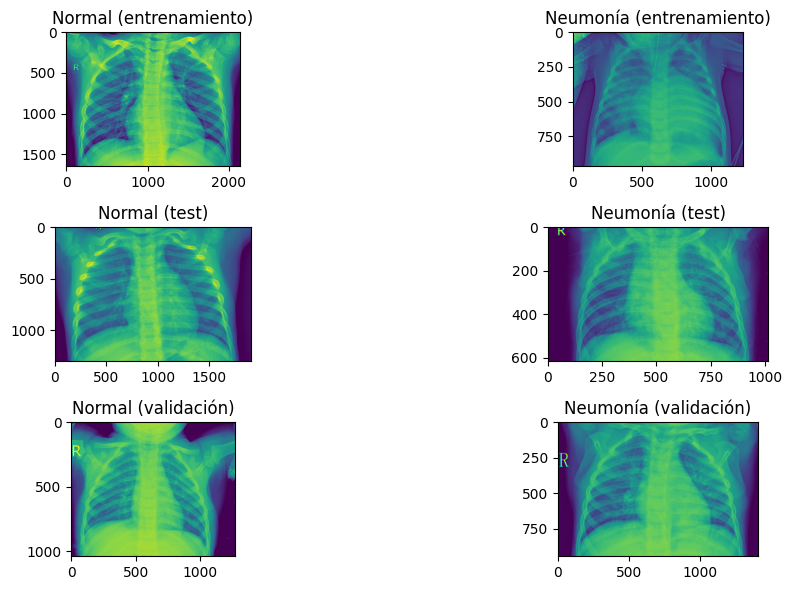

In [ ]:
plt.figure(figsize = (12, 6))

plt.subplot(3, 2, 1)
plt.imshow(img_train_normal)

plt.title("Normal (entrenamiento)")

plt.subplot(3, 2, 2)
plt.imshow(img_train_pneumonia)
plt.title("Neumonía (entrenamiento)")

plt.subplot(3, 2, 3)
plt.imshow(img_test_normal)
plt.title("Normal (test)")

plt.subplot(3, 2, 4)
plt.imshow(img_test_pneumonia)
plt.title("Neumonía (test)")

plt.subplot(3, 2, 5)
plt.imshow(img_val_normal)
plt.title("Normal (validación)")

plt.subplot(3, 2, 6)
plt.imshow(img_val_pneumonia)
plt.title("Neumonía (validación)")

plt.tight_layout()

plt.show()

# Creación del modelo

Este código configura y crea generadores de datos usando ImageDataGenerator para normalizar píxeles y generar lotes de imágenes desde carpetas específicas para entrenamiento, validación y prueba.

- Normalización (rescale = 1./255): Cada píxel se divide por 255, lo que ajusta los valores en un rango de [0, 1], facilitando su manejo por el modelo.

- flow_from_directory: Esta función crea flujos de datos que alimentan al modelo durante el entrenamiento y la evaluación.

- train_generator = train_datagen.flow_from_directory(): Configura el generador de datos para el conjunto de entrenamiento (o prueba o validación según sea el caso).

- train_path: Ruta de la carpeta que contiene las imágenes de entrenamiento (o prueba o validación según sea el caso).

- target_size = (150, 150): Establece el tamaño de las imágenes en 150x150 píxeles al cargarlas.

- batch_size = batch_size: Define el número de imágenes procesadas antes de que el modelo actualice sus pesos.

- class_mode = "binary": Indica que se trata de un problema de clasificación binaria. Para múltiples clases, se usaría "categorical".

**Normalización de datos**

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1. / 255)
val_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = "binary"
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = "binary"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = "binary"
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Entrenamiento del modelo de red neuronal CNN

CNN significa "Convolutional Neural Network" o Red Neuronal Convolucional en español que es un modelo especializado que se usa para procesar imágenes, identificando patrones como formas o texturas para clasificar objetos dentro de las imágenes.

Explicación de las capas:

- Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)):

    - Esta es una capa convolucional con 32 filtros de tamaño 3x3, usando la función de activación ReLU. La entrada tiene una forma de (150, 150, 3), que corresponde al ancho, alto y número de canales de la imagen (RGB).

- MaxPooling2D((2, 2)):

    - Aplica un max pooling con un kernel de 2x2, reduciendo la resolución de la imagen a la mitad en cada dimensión.

- Conv2D(64, (3, 3), activation="relu"):

    - Similar a la primera capa, pero con 64 filtros.

- MaxPooling2D((2, 2)):

    - Repite el proceso de max pooling para reducir aún más la resolución.

- Flatten():

    - Convierte la salida de las capas convolucionales en un vector de una sola dimensión.

- Dense(64, activation = "relu"):

    - Capa completamente conectada (densa) con 64 neuronas y activación ReLU.

- Dense(1, activation = "sigmoid"):

    - Capa de salida con 1 neurona y activación sigmoid. Esta neurona produce la predicción del modelo, que será un valor entre 0 y 1.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Definimos el número de épocas (epochs), que en este caso será de 10. Utilizamos el método fit() del modelo para entrenarlo con los generadores de entrenamiento y validación.

- train_generator: Este es el generador de entrenamiento que se usará para entrenar el modelo.

- steps_per_epoch: Indica el número de pasos por época. Aquí, cada época recorrerá todo el conjunto de datos de entrenamiento una vez.

- validation_data: Este es el generador de validación que se empleará para evaluar el modelo durante el entrenamiento.

- validation_steps: Especifica el número de pasos por época de validación. En este caso, cada época de validación recorrerá todo el conjunto de datos de validación una vez.

**Entrenamiento del modelo utilizando el generador de datos de entrenamiento y validación.**

In [ ]:
epochs = 10

history = model.fit(
    train_generator, # Generador de datos de entrenamiento
    steps_per_epoch = len(train_generator), # Número total de pasos por época, es generalmente igual al número de lotes
    epochs = epochs, # Número de épocas de entrenamiento
    validation_data = val_generator, # Generador de datos de validación
    validation_steps = len(val_generator) # Número total de pasos de validación
)

Epoch 1/10
163/163 [==============================] - 1542s 9s/step - loss: 0.2393 - accuracy: 0.9055 - val_loss: 0.1405 - val_accuracy: 0.9375
Epoch 2/10
163/163 [==============================] - 262s 2s/step - loss: 0.0997 - accuracy: 0.9630 - val_loss: 0.3435 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 251s 2s/step - loss: 0.0651 - accuracy: 0.9757 - val_loss: 0.1350 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 252s 2s/step - loss: 0.0499 - accuracy: 0.9814 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 246s 2s/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0461 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 243s 1s/step - loss: 0.0279 - accuracy: 0.9902 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 252s 2s/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.0554 - val_accuracy: 1.000

**Evaluación con el conjunto de prueba.**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

20/20 [==============================] - 246s 13s/step - loss: 3.3902 - accuracy: 0.7147
Test accuracy: 0.7147436141967773


Explicación del siguiente paso:

model.save: Esta línea guarda los pesos y la estructura del modelo en un archivo con extensión .h5. El archivo generado, model_weights.h5, contiene toda la información necesaria para reutilizar el modelo entrenado, permitiendo recargarlo posteriormente sin tener que entrenarlo de nuevo.

"model_weights.h5": Este es el nombre del archivo en el que se guardarán los pesos. El formato .h5 es comúnmente utilizado para almacenar grandes estructuras de datos en archivos.

In [ ]:
model.save("model_weights.h5")

In [ ]:
from google.colab import files
files.download("model_weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Gráficas del Modelo

**Gráfico 1**

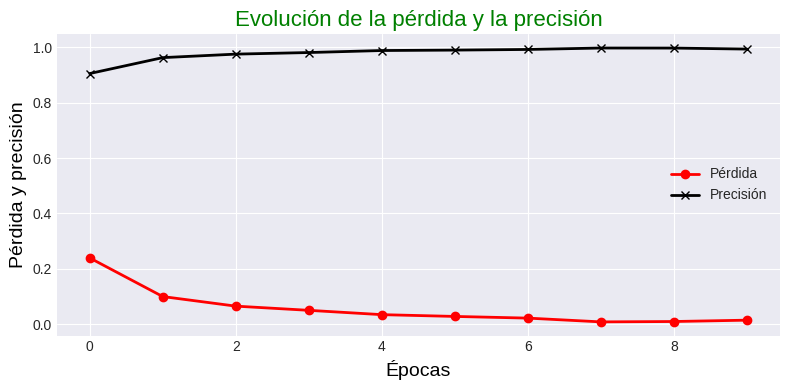

In [ ]:
plt.style.use("seaborn-darkgrid")

plt.figure(figsize = (8, 4))
plt.plot(history.history["loss"], color = "red", label = "Pérdida", linewidth = 2, marker = "o")
plt.plot(history.history["accuracy"], color = "black", label = "Precisión", linewidth = 2, marker = "x")

plt.title("Evolución de la pérdida y la precisión", color = "green", fontsize = 16)
plt.xlabel("Épocas", color = "black", fontsize = 14)
plt.ylabel("Pérdida y precisión", color = "black", fontsize = 14)

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico muestra cómo la pérdida del modelo (línea roja) disminuye constantemente a medida que avanza el entrenamiento, lo que indica que el modelo está ajustándose mejor a los datos.

Por otro lado, la precisión (línea negra) aumenta y se mantiene cerca de 1.0 conforme el modelo continúa aprendiendo. Esto sugiere que el modelo está mejorando en la identificación de imágenes de rayos X con neumonía a medida que es entrenado con más datos.

**Gráfico 2**

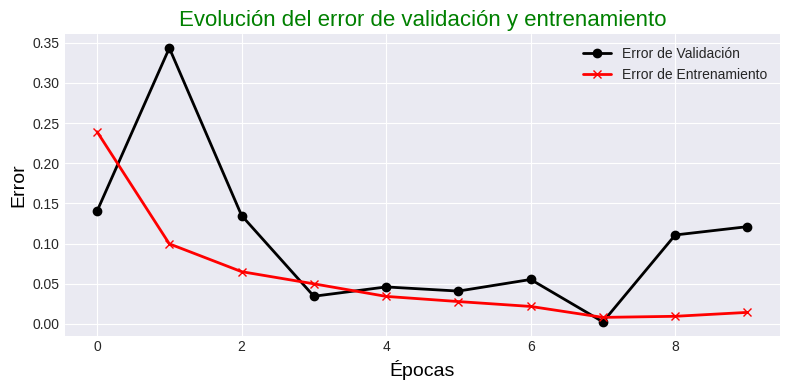

In [ ]:
plt.style.use("seaborn-darkgrid")

plt.figure(figsize = (8, 4))
plt.plot(history.history["val_loss"], color = "black", label = "Error de Validación", linewidth = 2, marker = "o")
plt.plot(history.history["loss"], color = "red", label = "Error de Entrenamiento", linewidth = 2, marker = "x")

plt.title("Evolución del error de validación y entrenamiento", color = "green", fontsize = 16)
plt.xlabel("Épocas", color = "black", fontsize = 14)
plt.ylabel("Error", color = "black", fontsize = 14)

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico muestra la evolución del error tanto en el entrenamiento como en la validación a lo largo de las épocas. Durante las primeras épocas, ambos errores disminuyen, lo que indica que el modelo está aprendiendo correctamente. Sin embargo, en las últimas épocas, el error de validación comienza a fluctuar y muestra un aumento en la última época, mientras que el error de entrenamiento sigue siendo bajo y estable. Esto sugiere que el modelo podría estar ajustándose demasiado a los datos de entrenamiento (sobreajuste), ya que su desempeño en la validación comienza a empeorar mientras sigue mejorando en los datos de entrenamiento.

# Predicción del modelo

**Predicciones con los datos de prueba.**

In [ ]:
num_predictions = 10
test_images, test_labels = next(test_generator)
# test_images: Contiene el lote de imágenes de prueba.
# test_labels: Contiene las etiquetas correspondientes a esas imágenes de prueba.

In [ ]:
predictions = model.predict(test_images)

1/1 [==============================] - 0s 334ms/step


**Se convierten las predicciones a etiquetas binarias (0 o 1)**

In [ ]:
binary_predictions = np.round(predictions)

**Etiquetas reales**

In [ ]:
y_true = test_labels
y_true

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

**Predicciones**

In [ ]:
y_pred = binary_predictions
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

# Métricas del modelo

In [ ]:
metricas = classification_report(y_true, y_pred)
print(metricas)

              precision    recall  f1-score   support

         0.0       1.00      0.58      0.74        12
         1.0       0.80      1.00      0.89        20

    accuracy                           0.84        32
   macro avg       0.90      0.79      0.81        32
weighted avg       0.88      0.84      0.83        32



**Interpretación de los resultados:**

El modelo tiene una precisión perfecta (1.00) para la clase 0.0, lo que significa que siempre acierta cuando predice que una observación pertenece a esta clase. Sin embargo, su recall es bajo (0.58), lo que indica que solo es capaz de identificar correctamente el 58% de las observaciones reales de la clase 0.0.

Para la clase 1.0, el modelo presenta una precisión del 80% y un recall del 100%. Esto significa que cuando predice que una observación pertenece a la clase 1.0, acierta el 80% de las veces. Además, el modelo identifica correctamente todas las observaciones reales de la clase 1.0.

El accuracy general del modelo es del 84%, lo que indica que en general acierta el 84% de las veces, independientemente de la clase.

El promedio ponderado (weighted avg) de la precisión es del 88% y el recall es del 84%. Esto sugiere que el modelo tiene un rendimiento sólido, pero podría mejorar en la identificación de la clase 0.0, que es donde muestra mayores deficiencias en términos de recall.

# Matriz de confusión

In [ ]:
conf_matrix = confusion_matrix(y_true, binary_predictions)
print("Matriz de confusión: \n", conf_matrix)

Matriz de confusión: 
 [[ 7  5]
 [ 0 20]]


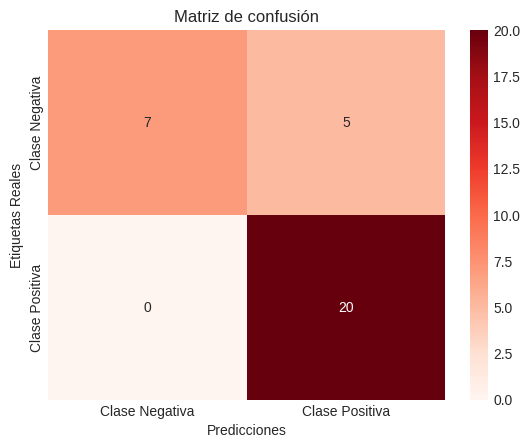

In [ ]:
labels = ["Clase Negativa", "Clase Positiva"]

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Reds", xticklabels = labels, yticklabels = labels)

plt.title("Matriz de confusión")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Reales")
plt.show()

**Interpretación:**

El modelo muestra 20 verdaderos positivos, lo que indica que identifica correctamente a la mayoría de los pacientes con neumonía. Sin embargo, también presenta 5 falsos positivos, lo que significa que en algunos casos predice neumonía cuando los pacientes no la tienen.

Hay 0 falsos negativos, lo cual es excelente en contextos médicos, ya que significa que no se omite el diagnóstico de ningún paciente con neumonía.

En resumen, el modelo tiene una alta sensibilidad (detecta bien los casos positivos), pero la especificidad podría ser mejor (no distingue tan bien los casos sin neumonía). Esto sugiere que el modelo podría estar priorizando la detección de neumonía para minimizar el riesgo de no diagnosticarla, aunque esto conlleva un aumento de falsos positivos. Ajustes adicionales podrían mejorar la precisión en la identificación de los casos negativos.



---



**Notas clave de la matriz de confusión:**

- Verdaderos positivos (VP): 20
- Falsos positivos (FP): 5
- Verdaderos negativos (VN): 7
- Falsos negativos (FN): 0

El siguiente código generará una figura con 2 filas y 5 columnas de subgráficos, cada uno mostrando una imagen junto con la predicción del modelo. Esto permite una visualización rápida de varias imágenes con sus predicciones correspondientes, facilitando la evaluación del rendimiento del modelo.

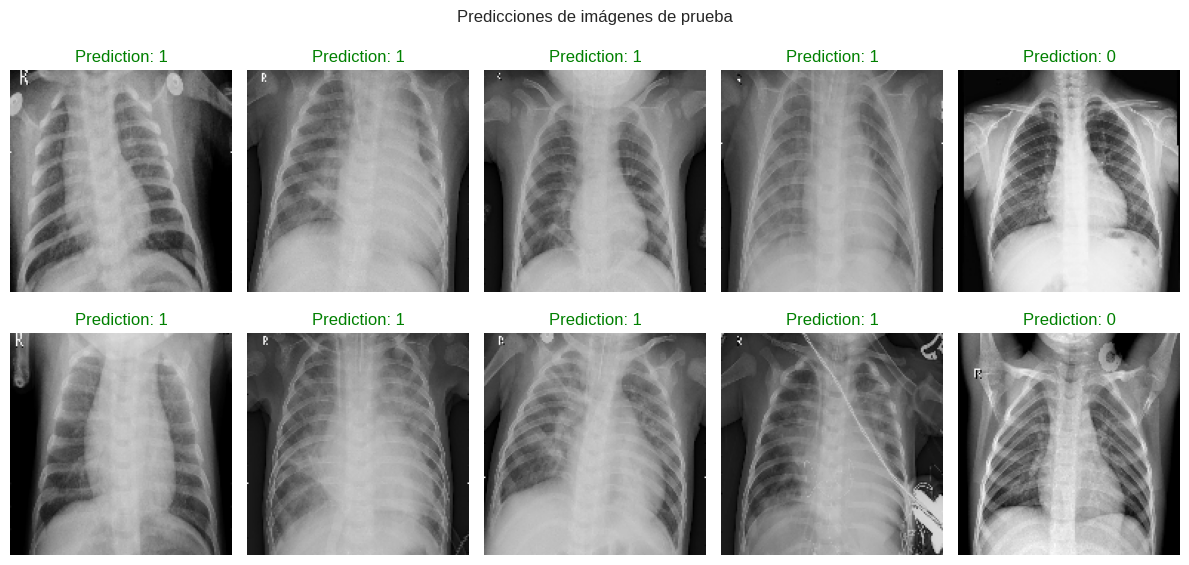

In [ ]:
plt.figure(figsize = (12, 6))
for i, (image, prediction) in enumerate(zip(test_images, predictions[:num_predictions])):
    plt.subplot(2, 5, i+1)
    plt.imshow(image)

    pred_label = round(prediction[0])
    true_label = test_labels[i]
    color = "green" if pred_label == true_label else "red"

    plt.title(f"Prediction: {pred_label}", color = color)
    plt.axis("off")

plt.suptitle("Predicciones de imágenes de prueba")
plt.tight_layout()
plt.show()

In [ ]:
!python --version

Python 3.10.12


# Tuning

El **tuning** (o ajuste de hiperparámetros) es como ajustar las perillas o configuraciones de un modelo para que funcione mejor. En un modelo de machine learning, hay algunos parámetros que no se aprenden automáticamente, como el tamaño de las capas o la velocidad de aprendizaje. Estos se llaman hiperparámetros. El tuning es el proceso de probar diferentes valores para estos parámetros y ver cuáles hacen que el modelo funcione de la mejor manera posible, logrando predicciones más precisas.

Es como si estuviéramos ajustando el motor de un automóvil: Se prueban diferentes configuraciones para que el auto corra lo más rápido posible, pero sin gastar demasiado combustible.

**Se define una función para construir el modelo con hiperparámetros variables**

Explicación de las capas:

- Conv2D(hp.Choice("conv_filters_1", values = [32, 64, 128]), (3, 3), activation = "relu", input_shape = (150, 150, 3)):

    - Esta es una capa convolucional con un número de filtros que se elige dinámicamente de entre los valores 32, 64 o 128. El tamaño del filtro es 3x3 y se utiliza la función de activación ReLU (Rectified Linear Unit), que ayuda a introducir no linealidades al modelo. La entrada es una imagen con forma (150, 150, 3), lo que corresponde al ancho, alto y número de canales de la imagen (RGB).

- MaxPooling2D((2, 2)):

    - Esta capa de max pooling reduce las dimensiones espaciales de la imagen a la mitad, utilizando un kernel de 2x2, lo que permite reducir la resolución y mantener las características más relevantes de la imagen.

- Conv2D(hp.Choice("conv_filters_2", values = [32, 64]), (3, 3), activation = "relu"):

    - Esta es otra capa convolucional, pero el número de filtros es ajustable, eligiéndose entre 32 o 64. Igual que en la primera capa, usa filtros de tamaño 3x3 y la activación ReLU. Esta capa extrae características más avanzadas de la imagen después de la primera etapa de reducción.

- MaxPooling2D((2, 2)):

    - Se repite el proceso de max pooling con un kernel de 2x2, lo que reduce aún más las dimensiones espaciales de la imagen. Este paso ayuda a reducir la cantidad de parámetros y previene el sobreajuste.

- Flatten():

    - Esta capa aplana la salida tridimensional de las capas convolucionales en un solo vector, que luego será procesado por las capas densas. Es una transición entre las capas convolucionales y las completamente conectadas.

- Dense(hp.Int("dense_units", min_value = 64, max_value = 256, step = 64), activation = "relu"):

    - Esta es una capa densa completamente conectada que utiliza un número de neuronas ajustable entre 64 y 256, en incrementos de 64. Se aplica la función de activación ReLU para proporcionar no linealidad al modelo. Aquí, las características extraídas se combinan para aprender patrones más complejos.

- Dense(1, activation = "sigmoid"):

    - Esta es la capa de salida con una única neurona y una función de activación sigmoid, que produce un valor entre 0 y 1. Esta capa es típica en problemas de clasificación binaria, como la detección de neumonía, donde el modelo predice si una imagen pertenece a una clase o a otra.

**Compilación del modelo:**

El modelo se compila con:

- Optimizer (Adam): Se usa el optimizador Adam, que ajusta los parámetros del modelo basándose en la tasa de aprendizaje. El valor de la tasa de aprendizaje también es ajustable, con opciones de 1e-3, 1e-4 o 1e-5.

- Loss (binary_crossentropy): Dado que se trata de un problema de clasificación binaria, se utiliza la función de pérdida de entropía cruzada binaria.

- Metrics (accuracy): Se mide la precisión del modelo como métrica de rendimiento.

In [ ]:
# %%capture
# !pip install keras-tuner

**Definición de la función para construir el modelo**

In [ ]:
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential([
        Conv2D(hp.Choice("conv_filters_1", values = [32, 64, 128]), (3, 3), activation = "relu", input_shape = (150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(hp.Choice("conv_filters_2", values = [32, 64]), (3, 3), activation = "relu"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(hp.Int("dense_units", min_value = 64, max_value = 256, step = 64), activation = "relu"),
        Dense(1, activation = "sigmoid")
    ])

    model.compile(optimizer = Adam(learning_rate = hp.Choice("learning_rate", values = [1e-3, 1e-4, 1e-5])),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"])

    return model

**Configuración de la búsqueda de hiperparámetros**

En este paso, se configurará el RandomSearch para probar diferentes combinaciones de hiperparámetros y optimizar el rendimiento del modelo.

- tuner = RandomSearch(...):

    - Esta línea crea un objeto tuner utilizando la clase RandomSearch de Keras Tuner. RandomSearch es un método para buscar hiperparámetros de manera aleatoria.

- build_model:

    - Esta es una función que se encarga de construir y compilar el modelo de red neuronal. La función debe tomar ciertos argumentos, que son los hiperparámetros que se ajustarán.

- objective = "val_accuracy":

    - Aquí se especifica el objetivo a maximizar. En este caso, es la "exactitud en el conjunto de validación" (val_accuracy). El tuner intentará encontrar la combinación de hiperparámetros que produzca la mayor exactitud en el conjunto de validación.

- max_trials = 5:

    - Este parámetro define el número máximo de combinaciones de hiperparámetros que se probarán. En este caso, se realizarán hasta 5 pruebas diferentes. Cada prueba puede consistir en una combinación única de hiperparámetros.

- executions_per_trial = 1:

    - Este parámetro indica cuántas veces se ejecutará cada combinación de hiperparámetros. Al establecerlo en 1, el tuner solo ejecutará cada combinación una vez.

- directory = "tuning_dir":

    - Este argumento especifica el directorio en el que se guardarán los resultados del tuning. Los resultados incluyen información sobre las pruebas realizadas y los resultados obtenidos.

- project_name = "cnn_tuning":

    - Aquí se define el nombre del proyecto, que se utilizará para organizar los resultados dentro del directorio especificado.

In [ ]:
tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",  # El objetivo es maximizar la exactitud en el set de validación
    max_trials = 5,  # Número de combinaciones a probar
    executions_per_trial = 1,  # Cuántas veces se va a  ejecutar cada combinación
    directory = "tuning_dir",  # Carpeta donde se guardarán los resultados
    project_name = "cnn_tuning"  # Nombre del proyecto
)

**Se inicia la búsqueda con el generador de entrenamiento y validación**


- tuner.search(...):

    - Esta es la función principal de Keras Tuner que se utiliza para buscar los mejores hiperparámetros para el modelo. Durante esta búsqueda, Keras Tuner evaluará diferentes combinaciones de hiperparámetros y entrenará el modelo en función de estas combinaciones.

- train_generator:

  - Este es el generador de datos que proporciona las imágenes de entrenamiento y sus etiquetas.

- steps_per_epoch = len(train_generator):

    - Este parámetro indica el número de pasos (o lotes) que se deben ejecutar en cada época durante el entrenamiento. Al establecerlo como len(train_generator), se está indicando que Keras Tuner ejecute un paso para cada lote de datos disponible en el generador de entrenamiento.

- validation_data = val_generator:

    - Este es el generador de datos para la validación. Al igual que train_generator, este generador proporciona las imágenes y etiquetas de validación. Keras Tuner utilizará estos datos para evaluar el rendimiento del modelo en cada combinación de hiperparámetros.

- validation_steps = len(val_generator):

    - Similar a steps_per_epoch, este parámetro indica cuántos pasos (o lotes) se deben ejecutar para la validación. Al establecerlo como len(val_generator), se garantiza que se utilicen todos los datos de validación disponibles.

- epochs = 10:

    - Este parámetro define el número total de épocas para el entrenamiento. En este caso, el modelo se entrenará durante 10 épocas por cada combinación de hiperparámetros probada.

In [ ]:
tuner.search(train_generator,
             steps_per_epoch = len(train_generator),
             validation_data = val_generator,
             validation_steps = len(val_generator),
             epochs = 10)

Trial 5 Complete [00h 34m 42s]
val_accuracy: 0.875

Best val_accuracy So Far: 0.9375
Total elapsed time: 05h 19m 52s


**Obtener el mejor modelo**

Una vez que la búsqueda de hiperparámetros se complete, se obtendrá el mejor modelo y se entrenará con los mejores hiperparámetros encontrados.

- tuner.get_best_models(num_models=1):

    - Este método se utiliza para obtener los mejores modelos que han sido entrenados y optimizados por Keras Tuner. En este caso, se solicita obtener un solo modelo (especificado por num_models=1).

    [0]: Se accede al primer (y único) modelo de la lista devuelta. Esto se asigna a la variable best_model, que ahora contiene el modelo con el mejor rendimiento encontrado durante el proceso de tuning.

- best_model.fit(...):

    - Se inicia el proceso de entrenamiento del mejor modelo obtenido anteriormente.

- train_generator:

    - Este es un generador de datos que proporciona las imágenes y etiquetas de entrenamiento. Se utiliza para alimentar el modelo durante el entrenamiento.

- steps_per_epoch = len(train_generator):

    - Este argumento especifica cuántos pasos se deben realizar en cada época. Aquí, se establece que el número de pasos por época es igual al número total de lotes (batches) en el generador de entrenamiento.

- validation_data = val_generator:

    - Este argumento proporciona el conjunto de datos de validación, que se usará para evaluar el modelo después de cada época.

- validation_steps = len(val_generator):

    - Especifica cuántos pasos se deben realizar para el conjunto de validación. Similar al número de pasos de entrenamiento, se establece que es igual al número total de lotes en el generador de validación.

- epochs = 10:

    - Define el número total de épocas que el modelo debe entrenar. En este caso, se entrenará durante 10 épocas.

- best_model.evaluate(test_generator):

    - Este método evalúa el modelo en el conjunto de datos de prueba (proporcionado por test_generator). Devuelve dos métricas: la pérdida (loss) y la precisión (accuracy) del modelo en el conjunto de prueba. Estas métricas se asignan a las variables test_loss y test_acc.

In [ ]:
best_model = tuner.get_best_models(num_models = 1)[0]

history = best_model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    validation_data = val_generator,
    validation_steps = len(val_generator),
    epochs = 10
)

test_loss, test_acc = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
163/163 [==============================] - 408s 2s/step - loss: 0.0996 - accuracy: 0.9649 - val_loss: 0.8892 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 394s 2s/step - loss: 0.0870 - accuracy: 0.9693 - val_loss: 0.3616 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 406s 2s/step - loss: 0.0496 - accuracy: 0.9818 - val_loss: 0.2141 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 402s 2s/step - loss: 0.0417 - accuracy: 0.9858 - val_loss: 0.0969 - val_accuracy: 0.9375
Epoch 5/10
163/163 [==============================] - 396s 2s/step - loss: 0.0336 - accuracy: 0.9887 - val_loss: 0.3021 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 403s 2s/step - loss: 0.0208 - accuracy: 0.9919 - val_loss: 0.2542 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 398s 2s/step - loss: 0.0232 - accuracy: 0.9919 - val_loss: 0.3543 - val_accuracy: 0.8750

**Visualización de los resultados del tuning**

In [ ]:
tuner.results_summary()

Results summary
Results in tuning_dir/cnn_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
conv_filters_1: 64
conv_filters_2: 64
dense_units: 64
learning_rate: 0.001
Score: 0.9375

Trial 2 summary
Hyperparameters:
conv_filters_1: 32
conv_filters_2: 32
dense_units: 64
learning_rate: 0.001
Score: 0.9375

Trial 0 summary
Hyperparameters:
conv_filters_1: 32
conv_filters_2: 32
dense_units: 256
learning_rate: 0.0001
Score: 0.875

Trial 3 summary
Hyperparameters:
conv_filters_1: 128
conv_filters_2: 64
dense_units: 128
learning_rate: 0.0001
Score: 0.875

Trial 4 summary
Hyperparameters:
conv_filters_1: 32
conv_filters_2: 32
dense_units: 64
learning_rate: 0.0001
Score: 0.875


La visualización de datos de los resultados indican que el mejor rendimiento se logró en dos pruebas (Trial 1 y Trial 2) con una precisión de validación de 0.9375, lo que indica que estos modelos tienen un buen potencial para clasificar correctamente los datos de validación.

En los dos mejores Trials, la cantidad de filtros convolucionales en las dos capas (conv_filters_1 y conv_filters_2) es de 64 en Trial 1 y de 32 en Trial 2, lo que sugiere que un número moderado de filtros puede ser efectivo.

In [ ]:
best_model.save("best_model_tuned.h5")

In [ ]:
files.download("best_model_tuned.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusión:**

Este modelo puede ser utilizado en la industria de la salud, específicamente en el departamento de radiología y puede ser implementado en máquinas de rayos X.

Esto puede ayudar a los radiólogos a predecir y analizar las imágenes de radiografías de tórax de manera más fácil y precisa, permitiendo diagnósticos más rápidos y eficientes. Al automatizar parte del proceso de detección de neumonía, los médicos pueden reducir el tiempo dedicado al análisis manual, lo que contribuye a un tratamiento más oportuno para los pacientes. Además, al mejorar la precisión del diagnóstico, se pueden evitar errores humanos y ofrecer una mayor confianza en los resultados. Este tipo de soluciones basadas en inteligencia artificial puede transformar la forma en que se detectan y tratan enfermedades pulmonares, salvando más vidas en el proceso.